# PCA and SIFT algorithms

The **SIFT (Scale-Invariant Feature Transform)** algorithm is a computer vision technique used for feature detection and description. It detects distinctive key points or features in an image that are robust to changes in scale, rotation, and affine transformations.

**Principal Component Analysis** is a popular linear dimensionality reduction technique. Data in real world is very high dimensional so we use dimensionality reduction methods to reduce the data to 2 dimensions. The aim of the article is to compress the image using principal component analysis. High dimensional data is sparse and appropriate statistical methods can not be applied on data. The image has dimension 200 x 200 pixels in size.

## Importing libraries and loading image

In [1]:
# Importing the required libraries
from skimage.io import imread, imshow
from skimage import color
import cv2

import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

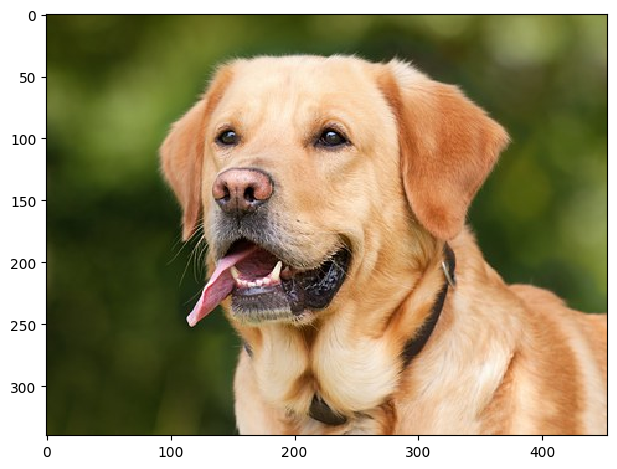

In [2]:
# Reading the image and plotting it
image = imread('images/dog.jpg')
imshow(image, cmap = 'gray')

## SIFT algorithm

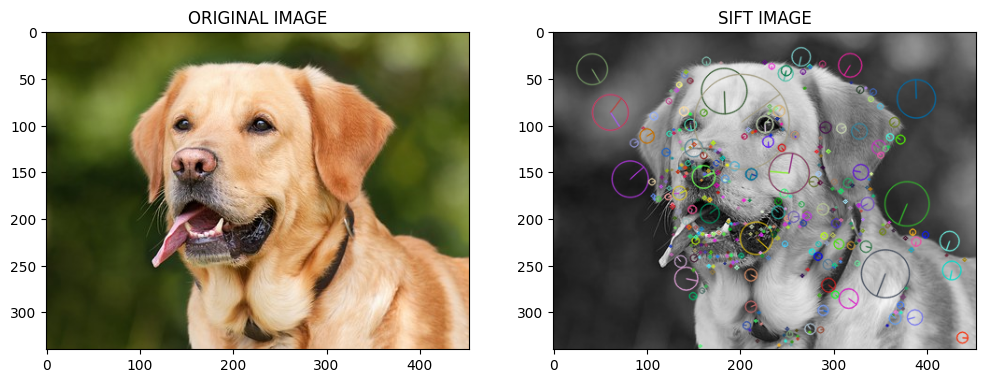

In [4]:
# Convert the image into grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
sift = cv2.SIFT_create()
kp = sift.detect(gray,None)

# draw keypoints in image
img = cv2.drawKeypoints(gray, kp, None, flags = cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

# Plotting the images
titles = ['ORIGINAL IMAGE', 'SIFT IMAGE']
images = [image, img]
count = 2

plt.figure(figsize = (12, 12))

for i in range(count):
    plt.subplot(1, 2, i + 1)
    plt.title(titles[i])
    plt.imshow(images[i], cmap = 'gray')
 
plt.show()

## PCA algorithm using OpenCV

([], [])

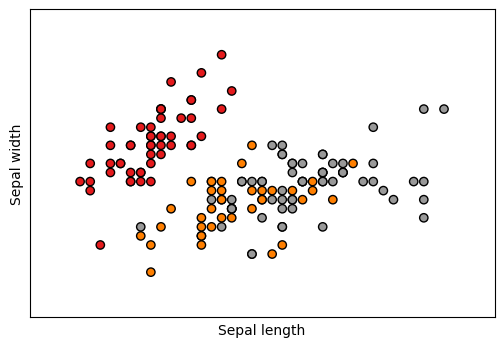

In [6]:
from sklearn import datasets
from sklearn.decomposition import PCA

iris = datasets.load_iris()

X = iris.data[:, :2]
y = iris.target

x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5

plt.figure(2, figsize=(6, 4))
plt.clf()

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1, edgecolor = 'k')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())

[Text(-0.8, 0, ''),
 Text(-0.6000000000000001, 0, ''),
 Text(-0.4, 0, ''),
 Text(-0.19999999999999996, 0, ''),
 Text(0.0, 0, ''),
 Text(0.19999999999999996, 0, ''),
 Text(0.40000000000000013, 0, ''),
 Text(0.6000000000000001, 0, ''),
 Text(0.8, 0, ''),
 Text(1.0, 0, '')]

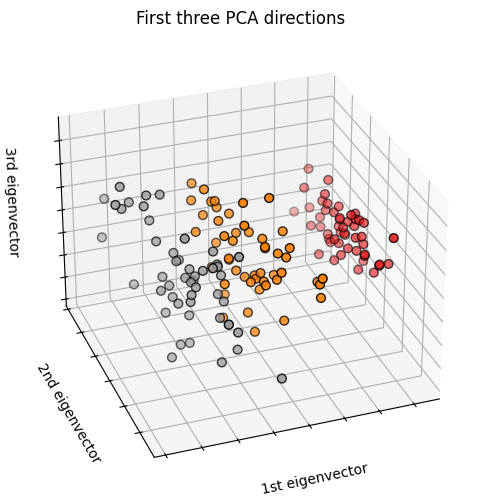

In [7]:
fig = plt.figure(1, figsize=(8, 6))
ax = fig.add_subplot(111, projection = '3d', elev=-150, azim=110)

X_reduced = PCA(n_components = 3).fit_transform(iris.data)
ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c = y, cmap=plt.cm.Set1, edgecolor = 'k', s=40)

ax.set_title('First three PCA directions')
ax.set_xlabel('1st eigenvector')
ax.xaxis.set_ticklabels([])
ax.set_ylabel('2nd eigenvector')
ax.yaxis.set_ticklabels([])
ax.set_zlabel('3rd eigenvector')
ax.zaxis.set_ticklabels([])